<a href="https://colab.research.google.com/github/Nidzoki/PMFSTIntroToDS/blob/main/w3/03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

### 2025./2026.

# UVOD U PODATKOVNU ZNANOST
## **Domaća zadaća  3**
#### Zadaci za samostalan rad

</div>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Zadatak 1.**

Učitajte datoteku **acs2017_census_tract_data.csv** u bilježnicu. Napravite preliminarnu EDA:
* koliko ima stupaca, redaka?
* koji su nazivi stupaca?
* koja je srednja vrijednost/medijan/standardna devijacija/varijanca proizvoljnih stupaca?
* koji se tipovi podataka nalaze u `DataFrame`-u?
* ...


Potražite što stupci predstavljaju.

> *Hint:* Opis podataka - [US Census Demographic Data](https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data)

In [35]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/acs2017_census_tract_data.csv")

In [36]:
print("Broj stupaca: ", data.shape[1], "\nBroj redaka: ", data.shape[0])
print("Nazivi stupaca: ", list(data.columns))

Broj stupaca:  37 
Broj redaka:  74001
Nazivi stupaca:  ['TractId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment']


#### **Zadatak 2.**
Pogledajte koliko stupaca (te koji su to stupci) i redaka sadrži NaN vrijednosti.

Pročistite učitane podatke:

- Uklonite retke s 4 ili više NaN vrijednosti
- Pogledajte koji stupci još uvijek imaju NaN vrijednosti
- NaN vrijednosti zamijenite sa srednjom vrijednosti odgovarajućeg stupca.

Prikažite dobivene (sređene) podatke u obliku DataFrame-a, te provjerite da više nema NaN vrijednosti.

In [42]:
print("NaN vrijednosti po stupcima: \n", data.isna().sum())

data_cleaned = data.dropna(thresh=data.shape[1] - 3)

print("\nBroj preostalih NaN vrijednosti po stupcima nakon uklanjanja redaka:\n", data_cleaned.isnull().sum())

data_cleaned = data_cleaned.fillna(data_cleaned.mean(numeric_only=True))

print("\nSređeni DataFrame:")
display(data_cleaned)

print("\nProvjera NaN vrijednosti u sređenom DataFrame-u:")
print(data_cleaned.isnull().sum().sum())

NaN vrijednosti po stupcima: 
 TractId                0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64

Broj preostalih NaN vrijednost

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5



Provjera NaN vrijednosti u sređenom DataFrame-u:
0


#### **Zadatak 3.**

Koristeći dobiveni (sređeni) `DataFrame` iz **Zadatka 2.** pronađite nazive 3 savezne države s najmanjom srednjom vrijednosti stope siromaštva i 3 savezne države s najvećom srednjom vrijednosti stope siromaštva.

In [54]:
print("Najmanja stopa siromaštva: \n", data_cleaned.groupby(['State'])['Poverty'].mean().sort_values()[:3])
print("Najveća stopa siromaštva: \n", data_cleaned.groupby(['State'])['Poverty'].mean().sort_values(ascending=False)[:3])

Najmanja stopa siromaštva: 
 State
New Hampshire     8.864384
Hawaii           10.478846
Maryland         10.779191
Name: Poverty, dtype: float64
Najveća stopa siromaštva: 
 State
Puerto Rico    46.186652
Mississippi    23.933333
Louisiana      21.812178
Name: Poverty, dtype: float64


#### **Zadatak 4.**
Za države iz **Zadatka 3.** izdvojite (u dva različita `DataFrame`-a, jedan za najmanju, a drugi za najveću stopu siromaštva) podatke iz sređenog `DataFrame`-a vezane za državu, okruge, ukupnu populaciju, siromaštvo, broj zaposlenih i stopu nezaposlenosti.

Kolika je ukupna populacija za svaku od tih 6 država?

In [61]:
lowest_poverty_states = ['New Hampshire', 'Hawaii', 'Maryland']
highest_poverty_states = ['Puerto Rico', 'Mississippi', 'Louisiana']

df_lowest_poverty = data_cleaned[data_cleaned['State'].isin(lowest_poverty_states)][['State', 'County', 'TotalPop', 'Poverty', 'Employed', 'Unemployment']]
df_highest_poverty = data_cleaned[data_cleaned['State'].isin(highest_poverty_states)][['State', 'County', 'TotalPop', 'Poverty', 'Employed', 'Unemployment']]

print("DataFrame za države s najnižom stopom siromaštva:")
display(df_lowest_poverty.head())

print("\nDataFrame za države s najvišom stopom siromaštva:")
display(df_highest_poverty.head())

total_pop_lowest = df_lowest_poverty.groupby('State')['TotalPop'].sum()
total_pop_highest = df_highest_poverty.groupby('State')['TotalPop'].sum()

print("\nUkupna populacija za države s najnižom stopom siromaštva:")
print(total_pop_lowest)

print("\nUkupna populacija za države s najvišom stopom siromaštva:")
print(total_pop_highest)

DataFrame za države s najnižom stopom siromaštva:


,State,County,TotalPop,Poverty,Employed,Unemployment
20310,Hawaii,Hawaii County,4646,20.0,1884,4.8
20311,Hawaii,Hawaii County,2319,20.3,595,8.9
20312,Hawaii,Hawaii County,4193,33.4,1728,8.4
20313,Hawaii,Hawaii County,3813,44.9,1522,10.2
20314,Hawaii,Hawaii County,5965,38.4,2357,8.4



DataFrame za države s najvišom stopom siromaštva:


,State,County,TotalPop,Poverty,Employed,Unemployment
28303,Louisiana,Acadia Parish,6187,31.3,2487,12.7
28304,Louisiana,Acadia Parish,5627,4.5,2660,6.4
28305,Louisiana,Acadia Parish,3494,19.7,1412,3.2
28306,Louisiana,Acadia Parish,7116,12.6,2893,5.6
28307,Louisiana,Acadia Parish,7126,14.3,3198,5.9



Ukupna populacija za države s najnižom stopom siromaštva:
State
Hawaii           1420461
Maryland         5975732
New Hampshire    1331848
Name: TotalPop, dtype: int64

Ukupna populacija za države s najvišom stopom siromaštva:
State
Louisiana      4661345
Mississippi    2986125
Puerto Rico    3466766
Name: TotalPop, dtype: int64


#### **Zadatak 5.**
Promotrite podatke u očišćenom `DataFrame`-u (dobivenom nakon **Zadatka 2**). Što mislite, postoji li veza između podataka vezanih za:
* sektor zaposlenih (`Professional`, `Service`, `Office`, `Construction`, `Production`) te podataka o prihodu (`Income`)?
* sektor zaposlenih (`Professional`, `Service`, `Office`, `Construction`, `Production`) te podataka o siromaštvu (`Poverty`)?


Vizualizirajte i komentirajte dobivene rezultate.

<Axes: >

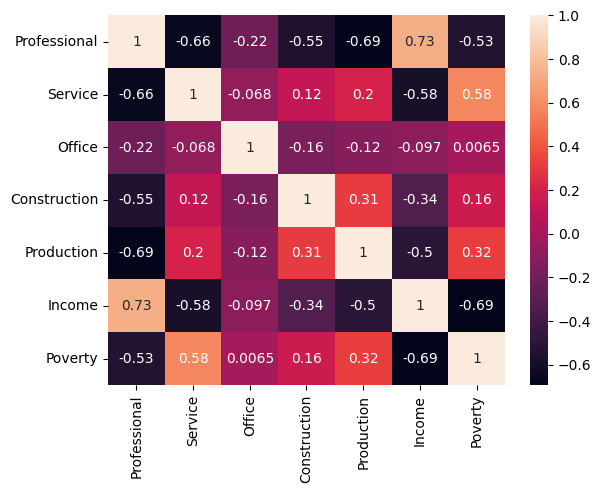

In [63]:
import seaborn as sns

data_cleaned_corr = data_cleaned[['Professional', 'Service', 'Office', 'Construction', 'Production', 'Income', 'Poverty']].corr()
sns.heatmap(data_cleaned_corr, annot=True)

## Analiza matrice korelacije
- `Professional` ima veliku pozitivnu korelaciju sa `Income` što znači da u područjima gdje je veći broj zaposlenih u profesionalnim zanimanjima, prosječni prihod je obično viši.
- `Service` ima umjerenu negativnu korelaciju sa `Income` što znači da veći udio zaposlenih u uslužnom sektoru može biti povezan sa nižim prihodom.
- `Production` isto ima umjerenu negativnu korelaciju sa `Income` što isto znači da veći udio zaposlenih u proizvodnji može biti povezan sa nižim prihodima.
- `Construction` ima blagu negativnu korelaciju sa `Income`, dok je `Office` u značajno manjoj negativnoj korelaciji sa `Income` (gotovo 0), što znači da najmanje utječu na prihode/siromaštvo.

Korelacija pojedinih sektora sa `Poverty` je u pravilu samo obrnuta od korelacije sa `Income` u blago slabija ili jača.

#### **Zadatak 6.**
Koji je udio rasa za najnapučeniju državu, a koji za najmanje napučenu državu (koristeći podatke iz **Zadatka 2**)? Vizualizirajte i komentirajte dobivene rezultate.

In [82]:
total_pop_by_country = data_cleaned.groupby(by='State')['TotalPop'].sum().sort_values()
print("Najnapučenija: ", total_pop_by_country.index[-1])
print("Najmanje napučena: ", total_pop_by_country.index[0])

Najnapučenija:  California
Najmanje napučena:  Wyoming


In [101]:
total_pop_by_country.Wyoming

np.int64(583200)

In [99]:
# Rase - ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

california_races = data_cleaned[data_cleaned['State'] == 'California'][['TotalPop','Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']]
wyoming_races = data_cleaned[data_cleaned['State'] == 'Wyoming'][['TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']]


In [108]:
california_races_count = pd.DataFrame()
california_races_count['Hispanic'] = (california_races['TotalPop'] * california_races['Hispanic'] / 100) / total_pop_by_country.California
california_races_count['White'] = (california_races['TotalPop'] * california_races['White'] / 100) / total_pop_by_country.California
california_races_count['Black'] = (california_races['TotalPop'] * california_races['Black'] / 100) / total_pop_by_country.California
california_races_count['Native'] = (california_races['TotalPop'] * california_races['Native'] / 100) / total_pop_by_country.California
california_races_count['Asian'] = (california_races['TotalPop'] * california_races['Asian'] / 100) / total_pop_by_country.California
california_races_count['Pacific'] = (california_races['TotalPop'] * california_races['Pacific'] / 100) / total_pop_by_country.California
california_races_count.sum()

,0
Hispanic,0.387467
White,0.379418
Black,0.055070
Native,0.003517
Asian,0.139385
Pacific,0.003539


In [109]:
wyoming_races_count = pd.DataFrame()
wyoming_races_count['Hispanic'] = (wyoming_races['TotalPop'] * wyoming_races['Hispanic'] / 100) / total_pop_by_country.Wyoming
wyoming_races_count['White'] = (wyoming_races['TotalPop'] * wyoming_races['White'] / 100) / total_pop_by_country.Wyoming
wyoming_races_count['Black'] = (wyoming_races['TotalPop'] * wyoming_races['Black'] / 100) / total_pop_by_country.Wyoming
wyoming_races_count['Native'] = (wyoming_races['TotalPop'] * wyoming_races['Native'] / 100) / total_pop_by_country.Wyoming
wyoming_races_count['Asian'] = (wyoming_races['TotalPop'] * wyoming_races['Asian'] / 100) / total_pop_by_country.Wyoming
wyoming_races_count['Pacific'] = (wyoming_races['TotalPop'] * wyoming_races['Pacific'] / 100) / total_pop_by_country.Wyoming
wyoming_races_count.sum()

,0
Hispanic,0.097132
White,0.843027
Black,0.009942
Native,0.020514
Asian,0.008410
Pacific,0.000631


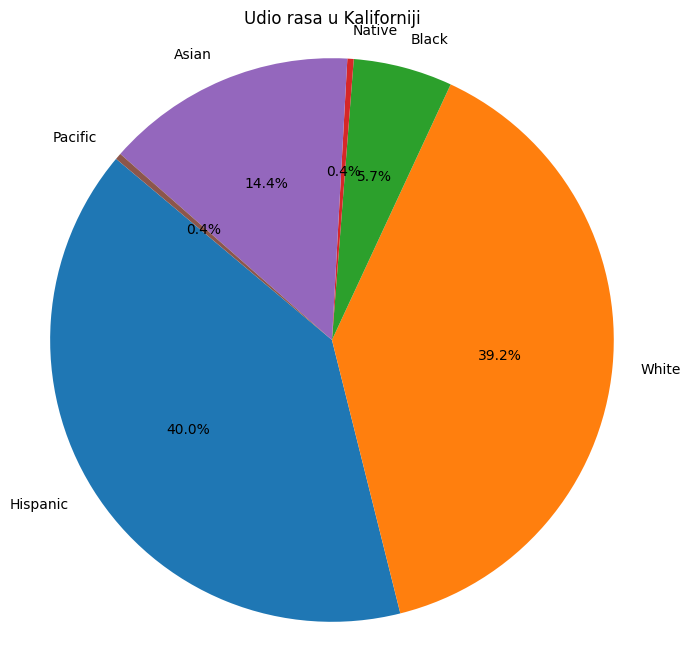

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(california_races_count.sum(), labels=california_races_count.columns, autopct='%1.1f%%', startangle=140)
plt.title('Udio rasa u Kaliforniji')
plt.axis('equal')
plt.show()

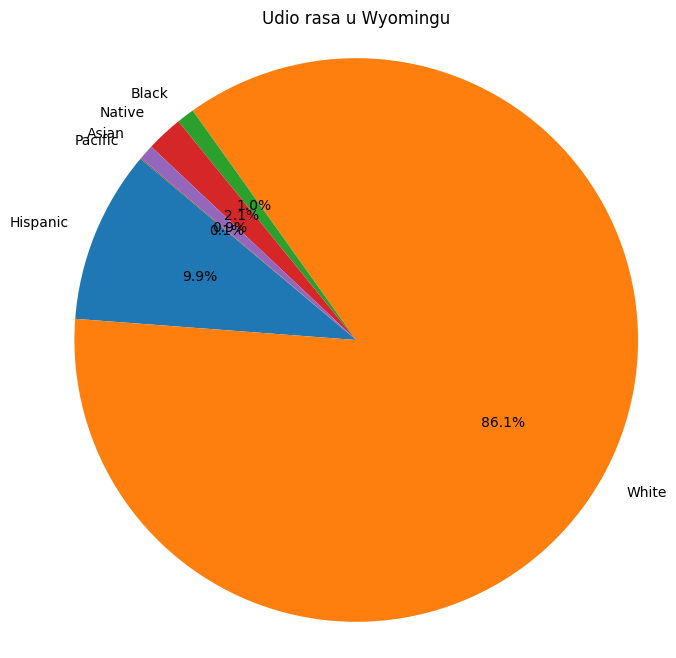

In [123]:

plt.figure(figsize=(8, 8))
plt.pie(wyoming_races_count.sum(), labels=wyoming_races_count.columns, autopct='%1.1f%%', startangle=140)
plt.title('Udio rasa u Wyomingu')
plt.axis('equal')
plt.show()

#### **Zadatak 7.**
Proizvoljno odaberite 3 savezne države. Za njih vizualizirajte odnose stupaca `IncomePerCap`, `Poverty`, `ChildPoverty`, `Unemployment` u parovima (obojajte grafove s obzirom na državu koju prikazuju)

> *Hint:* Proučite [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) vizualizaciju.

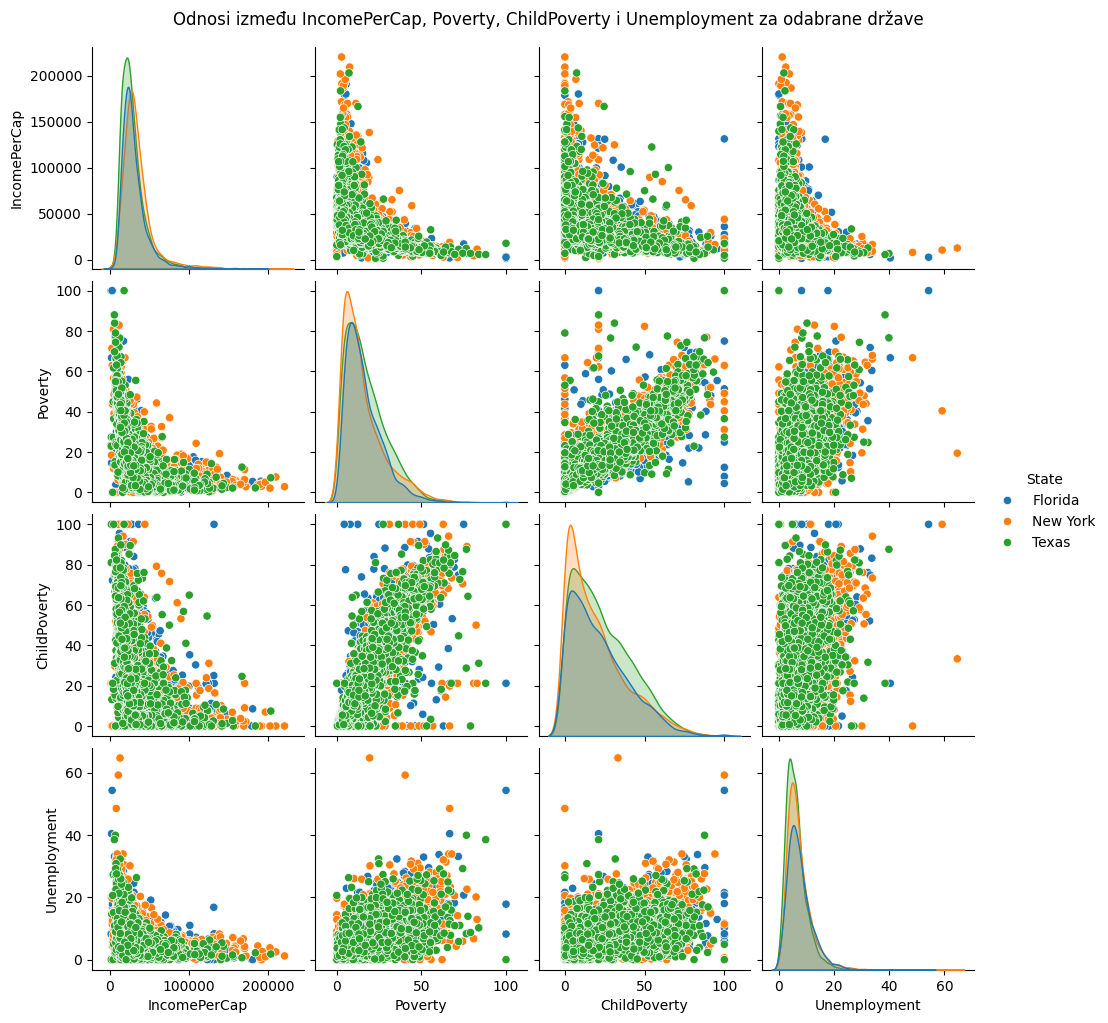

In [121]:
selected_states = ['New York', 'Texas', 'Florida']

df_selected_states = data_cleaned[data_cleaned['State'].isin(selected_states)]

pairplot_columns = ['IncomePerCap', 'Poverty', 'ChildPoverty', 'Unemployment']

sns.pairplot(df_selected_states, vars=pairplot_columns, hue='State', diag_kind='kde')
plt.suptitle('Odnosi između IncomePerCap, Poverty, ChildPoverty i Unemployment za odabrane države', y=1.02)
plt.show()